In [93]:
import tensorflow as tf;
from tensorflow import keras;
print(f"TensorFlow: {tf.__version__}\nKeras:{keras.__package__}")

TensorFlow: 2.13.0
Keras:keras.api._v2.keras


1.LOAD DATA

In [94]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.fashion_mnist.load_data()

In [95]:
type(X_train),type(Y_train)

(numpy.ndarray, numpy.ndarray)

In [96]:
X_train.shape,Y_train.shape, X_train.dtype,Y_train.dtype,Y_train[8]

((60000, 28, 28), (60000,), dtype('uint8'), dtype('uint8'), 5)

In [97]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [98]:
import matplotlib.pyplot as plt;


In [99]:
print(Y_train[8],Y_train[0])


5 9


In [100]:
class_names=["T-shirt/top","Trousser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"];
class_names[Y_train[0]]

'Ankle Boot'

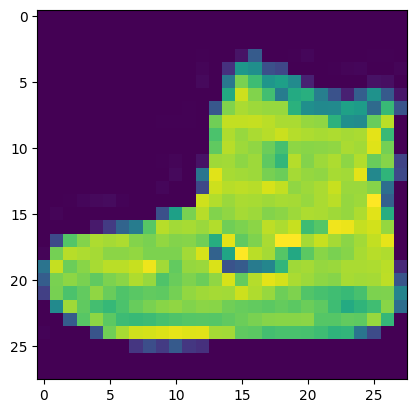

In [101]:
plt.imshow(X_train[0])

In [102]:
import numpy as np;
import random ;

<Figure size 640x480 with 0 Axes>

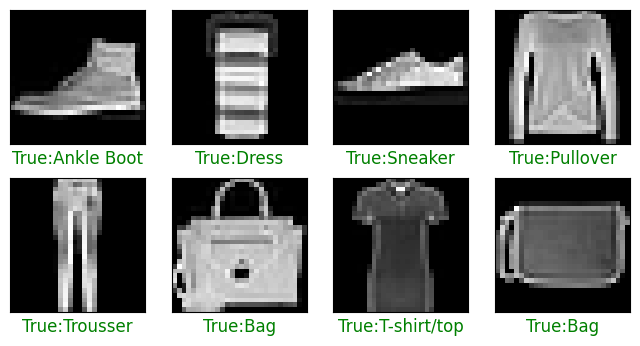

In [103]:
from typing import Optional

def plot_Data(x_data:np.ndarray,y_data:np.ndarray,y_proba:Optional[np.ndarray]=None)->None:
    nrows,ncols=2,4;
    fig,axes=plt.subplots(nrows,ncols,figsize=(8,4))
    len_x=x_data.shape[0]
    for idx in range(nrows*ncols):
        ax=axes[idx//ncols,idx%ncols]
        img_idx=random.randint(0,len_x)
        ax.imshow(x_data[img_idx],cmap="gray")
        ax.set(xticks=[],yticks=[])
        color='green'
        true_label_str=f"True:{class_names[y_data[img_idx]]}"
        if y_proba is not None:
            predicted_idx=np.argmax(y_proba[img_idx])
            predicted_label=class_names[predicted_idx]
            color='red' if predicted_idx!=y_data[img_idx] else color
            predicted_label_str=f"\nPredicted:{predicted_label}"
        img_title=true_label_str if y_proba is None else true_label_str+predicted_label_str
        ax.set_xlabel(img_title,color=color,fontsize=12)
        
    
plt.tight_layout()
plot_Data(X_train,Y_train)



2. DATA PRE PROCESSING - IMAGE PRE PROCESSING
2.1 Reshaping - Normalization gray scale value of each image from range 0-255 to 0,1 - to enhnance faster speed calculating in model
2.2 Convert uint8 to float32 for we can calculating data in ANN

In [104]:
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

In [105]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

3. Dimension TensorFlow ,PyTorch (samples, channel, width, height) => 4 dimensions 
3.1-> need 1 more channel


In [106]:
X_train=np.expand_dims(X_train,axis=-1)
X_test=np.expand_dims(X_test,axis=-1)
X_train.shape, X_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

3.2 convert class name label vector to the 1 hot binary vector=[1 0 0 0 0,...]

In [107]:
class_nums=len(class_names)
print(class_nums)
Y_train_label=keras.utils.to_categorical(Y_train,class_nums)
Y_test_label=keras.utils.to_categorical(Y_test,class_nums)
Y_train[0],Y_train_label[0]

10


(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

4. NETWORK ARCHITECT KERAS API -SEQUENTIAL MODEL


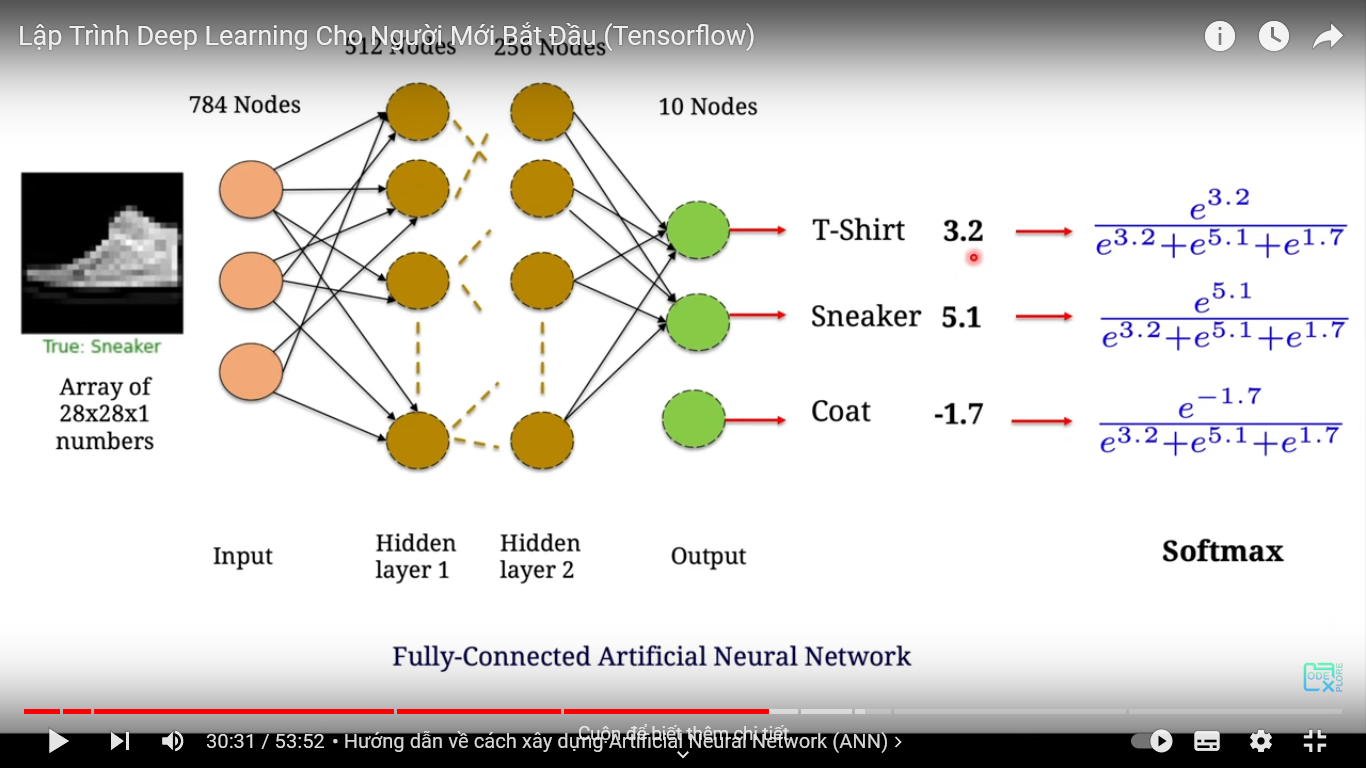

In [108]:
input_shape=(28,28,1)
model=keras.models.Sequential([
keras.layers.Flatten(input_shape=input_shape),
keras.layers.Dense(512,activation="relu"),
keras.layers.Dense(256,activation="relu"),
keras.layers.Dense(class_nums,activation="softmax")])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
# input - >data tranformation,..=> weight-> loss,..
# train model update parameter , optimizer , loss
# accuracy, prediction, compare true labels

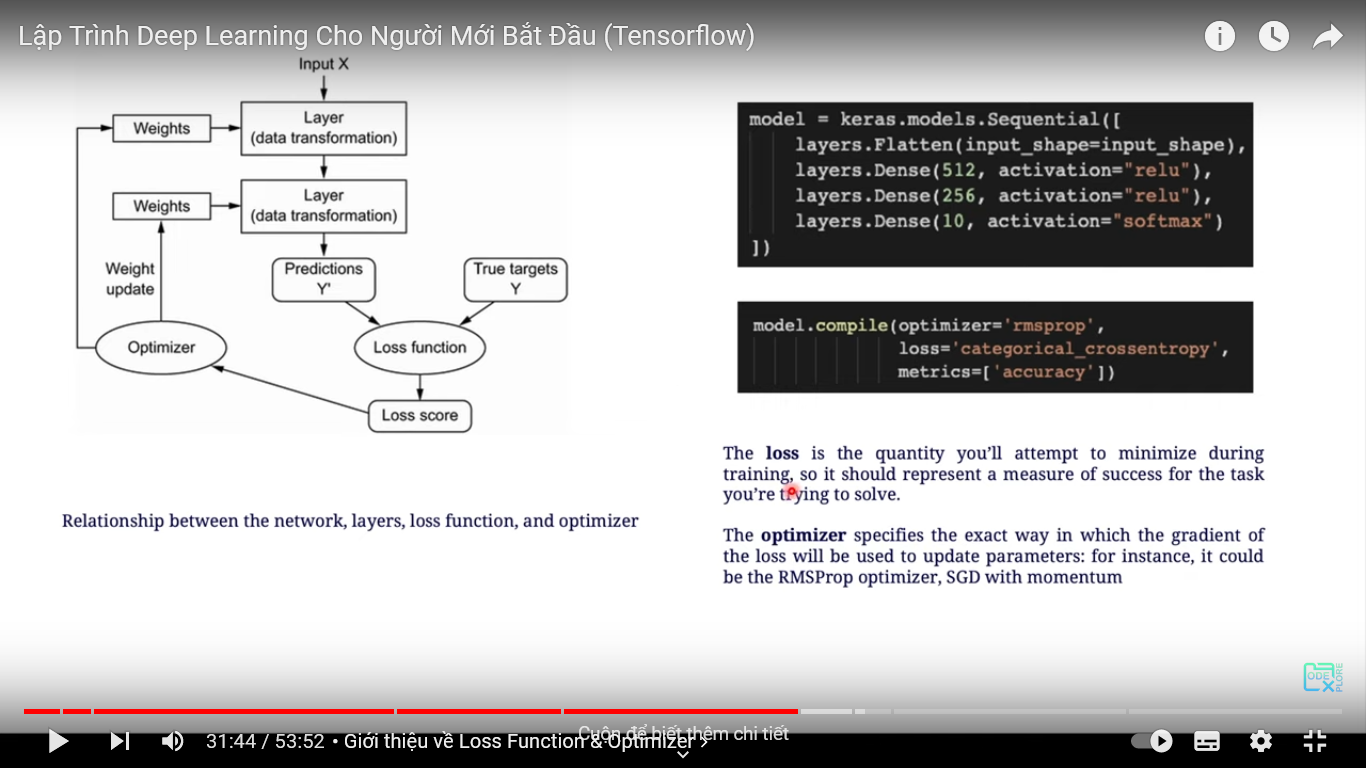

In [110]:
# train model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

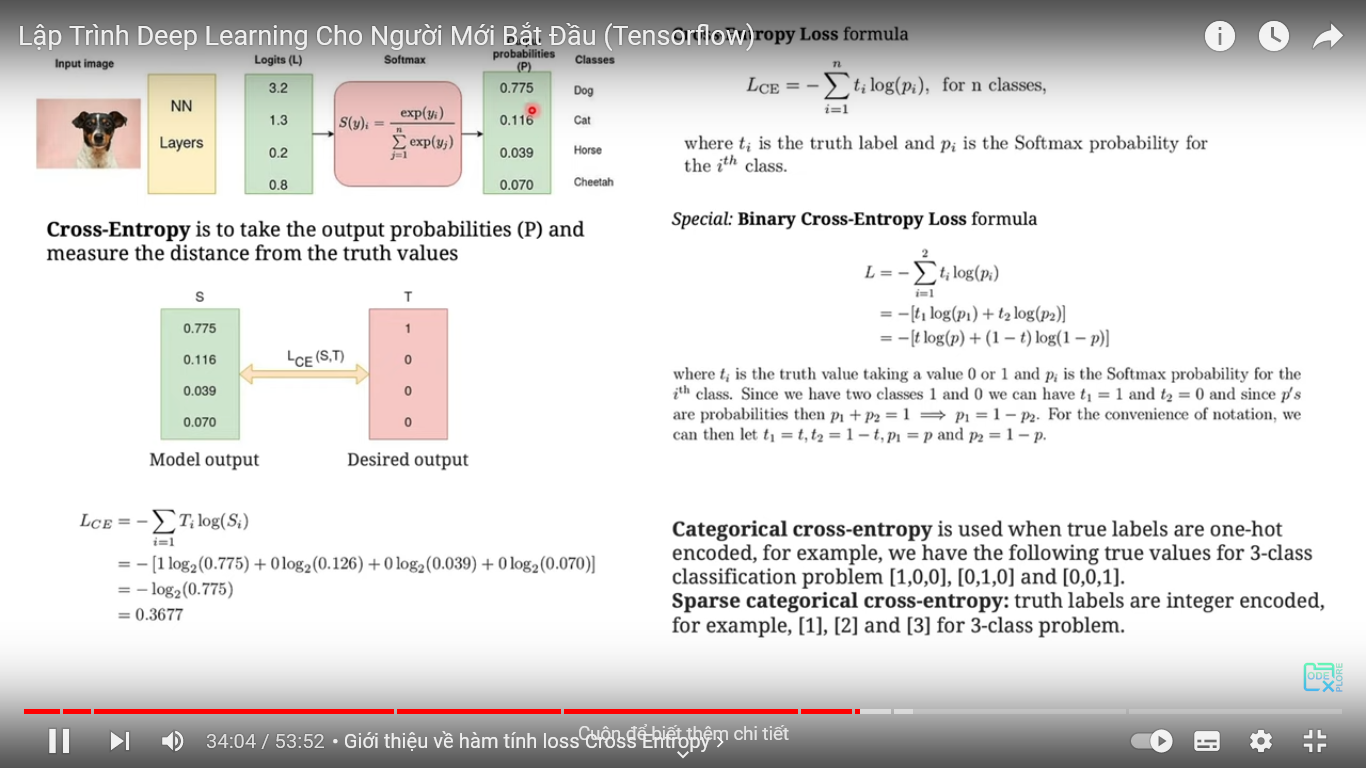

In [111]:
epochs=10;
batch_size=256
history = model.fit(X_train,Y_train_label,epochs=epochs,batch_size=batch_size,validation_split=0.1)

Epoch 1/10
211/211 [==============================] - 3s 13ms/step - loss: 0.6282 - accuracy: 0.7727 - val_loss: 0.4824 - val_accuracy: 0.8147
Epoch 2/10
211/211 [==============================] - 2s 12ms/step - loss: 0.4203 - accuracy: 0.8457 - val_loss: 0.4336 - val_accuracy: 0.8468
Epoch 3/10
211/211 [==============================] - 3s 12ms/step - loss: 0.3620 - accuracy: 0.8660 - val_loss: 0.3505 - val_accuracy: 0.8738
Epoch 4/10
211/211 [==============================] - 3s 14ms/step - loss: 0.3307 - accuracy: 0.8764 - val_loss: 0.3544 - val_accuracy: 0.8743
Epoch 5/10
211/211 [==============================] - 3s 14ms/step - loss: 0.3072 - accuracy: 0.8854 - val_loss: 0.3356 - val_accuracy: 0.8827
Epoch 6/10
211/211 [==============================] - 3s 12ms/step - loss: 0.2899 - accuracy: 0.8911 - val_loss: 0.3318 - val_accuracy: 0.8775
Epoch 7/10
211/211 [==============================] - 3s 12ms/step - loss: 0.2738 - accuracy: 0.8974 - val_loss: 0.3383 - val_accuracy: 0.8795

In [112]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [113]:
train_loss,val_loss=history_dict['loss'],history_dict['val_loss']
train_acc,val_acc=history_dict['accuracy'],history_dict['val_accuracy']

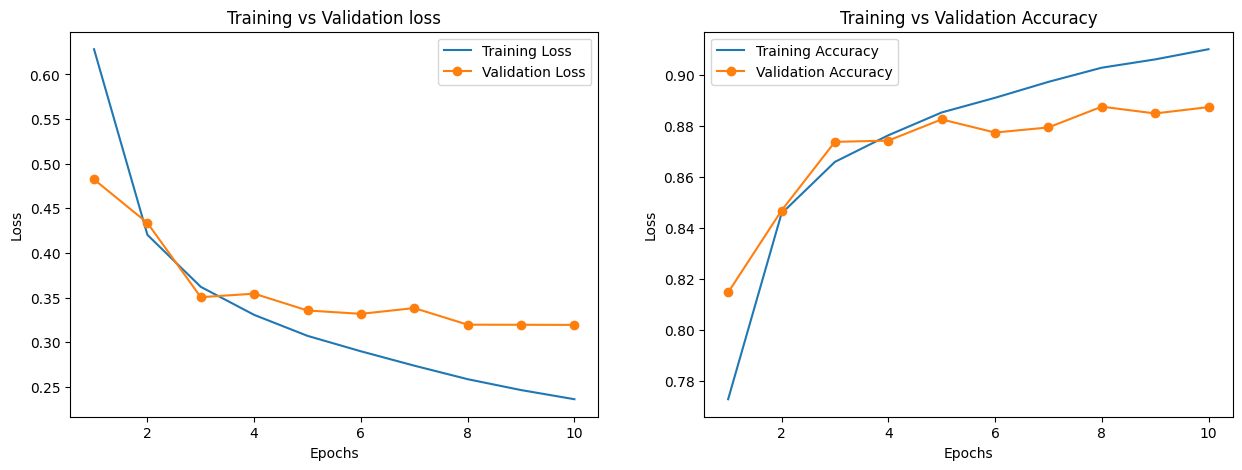

In [114]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
epoch_runs=[i+1 for i in range (epochs)]
ax1.plot(epoch_runs,train_loss,label="Training Loss")
ax1.plot(epoch_runs,val_loss,label="Validation Loss", marker='o')
ax1.set(title="Training vs Validation loss",xlabel="Epochs",ylabel="Loss")
ax1.legend()
ax2.plot(epoch_runs,train_acc,label="Training Accuracy")
ax2.plot(epoch_runs,val_acc,label="Validation Accuracy", marker='o')
ax2.set(title="Training vs Validation Accuracy",xlabel="Epochs",ylabel="Loss")
ax2.legend()
plt.show()

5.  MODEL VALIDATION

In [115]:
score=model.evaluate(X_test,Y_test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8764


In [116]:
print(f"Test Loss:{score[0]:.4f}")
print(f"Test Accuracy:{score[1]:.4f}")

Test Loss:0.3389
Test Accuracy:0.8764


6. PREDICTION


In [117]:
X_sample=X_test[:3]
y_proba=model.predict(X_sample)


1/1 [==============================] - 0s 112ms/step


In [118]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.007, 0.   ,
        0.993],
       [0.   , 0.   , 0.998, 0.   , 0.002, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [119]:
predictions=np.argmax(y_proba,axis=1)
[class_names[pred] for pred in predictions]

['Ankle Boot', 'Pullover', 'Trousser']

313/313 [==============================] - 1s 3ms/step


NameError: name 'imd_idx' is not defined

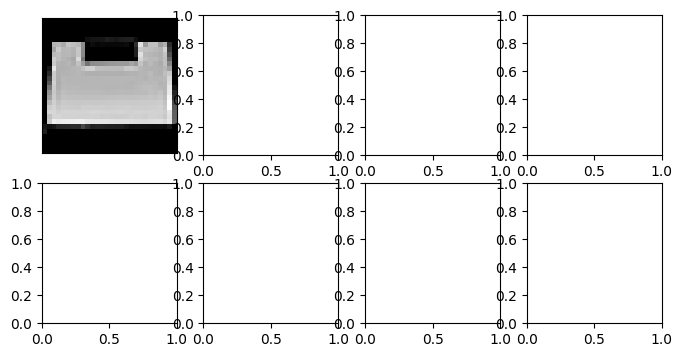

In [121]:
y_proba=model.predict(X_test)
plot_Data(X_test,Y_test,y_proba)